# Bivariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"/></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"/></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.hexbin()</td>
<td>df.plot.bar(stacked=True)</td>
<td>df.plot.line()</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</table>

----


In the previous notebook, we explored using `pandas` to plot and understand relationships within a single column. In this notebook, we'll expand this view by looking at plots that consider two variables at a time.

Data without relationships between variables is the data science equivalent of a blank canvas. To paint the picture in, we need to understand how variables interact with one another. Does an increase in one variable correlate with an increase in another? Does it relate to a decrease somewhere else? The best way to paint the picture in is by using plots that enable these possibilities.

In [8]:
import pandas as pd
reviews = pd.read_csv("wine.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Scatter plot

The simplest bivariate plot is the lowly **scatter plot**. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:

<AxesSubplot:xlabel='price', ylabel='points'>

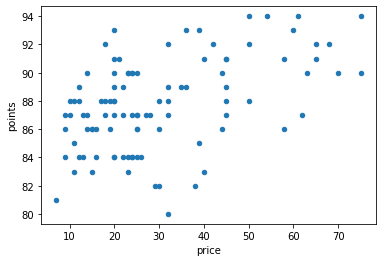

In [2]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

This plot shows us that price and points are weakly correlated: that is, that more expensive wines do generally earn more points when reviewed.

Note that in order to make effective use of this plot, we had to **downsample** our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place. For example, if two wines, both costing 100 dollars, get a rating of 90, then the second one is overplotted onto the first one, and we add just one point to the plot.

This isn't a problem if it happens just a few times. But with enough points the distribution starts to look like a shapeless blob, and you lose the forest for the trees:

<AxesSubplot:xlabel='price', ylabel='points'>

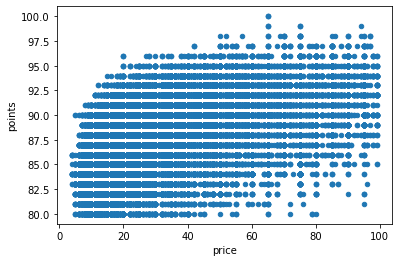

In [3]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Because of their weakness to overplotting, scatter plots work best with relatively small datasets, and with variables which have a large number of unique values.

There are a few ways to deal with overplotting. We've already demonstrated one way: sampling the points. Another interesting way to do this that's built right into `pandas` is to use our next plot type, a hexplot.

## Hexplot

A  **hex plot** aggregates points in space into hexagons, and then colors those hexagons based on the values within them:

<AxesSubplot:xlabel='price', ylabel='points'>

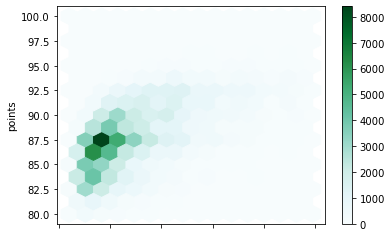

In [4]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

(note: the x-axis is `points`, but is missing from the chart due to a bug)

The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.

## Stacked plots

Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

The easiest way to modify them to support another visual variable is by using stacking. A stacked chart is one which plots the variables one on top of the other.

We'll use a supplemental selection of the five most common wines for this next section.

In [9]:
wine_counts = pd.read_csv("wine_counts.csv",
                          index_col=0)

`wine_counts` counts the number of times each of the possible review scores was received by the five most commonly reviewed types of wines:

In [10]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


Many `pandas` multivariate plots expect input data to be in this format, with one categorical variable in the columns, one categorical variable in the rows, and counts of their intersections in the entries. 

Let's now look at some stacked plots. We'll start with the stacked bar chart.

<AxesSubplot:xlabel='points'>

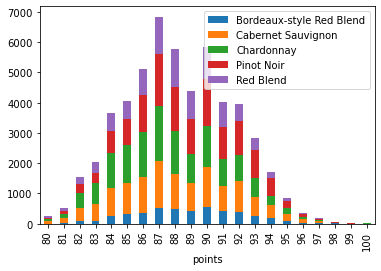

In [11]:
wine_counts.plot.bar(stacked=True)

Stacked bar plots share the strengths and weaknesses of univariate bar charts. They work best for nominal categorical or small ordinal categorical variables.

Another simple example is the area plot, which lends itself very naturally to this form of manipulation:

<AxesSubplot:xlabel='points'>

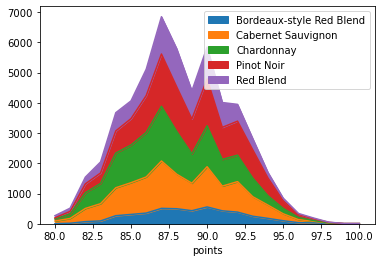

In [12]:
wine_counts.plot.area()

Like single-variable area charts, multivariate area charts are meant for nominal categorical or interval variables.

Stacked plots are visually very pretty. However, they have two major limitations.

The first limitation is that the second variable in a stacked plot must be a variable with a very limited number of possible values (probably an ordinal categorical, as here). Five different types of wine is a good number because it keeps the result interpretable; eight is sometimes mentioned as a suggested upper bound. Many dataset fields will not fit this critereon naturally, so you have to "make do", as here, by selecting a group of interest.

The second limitation is one of interpretability. As easy as they are to make, and as pretty as they look, stacked plots make it really hard to distinguish concrete values. For example, looking at the plots above, can you tell which wine got a score of 87 more often: Red Blends (in purple), Pinot Noir (in red), or Chardonnay (in green)? It's actually really hard to tell!

## Bivariate line chart

One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

<AxesSubplot:xlabel='points'>

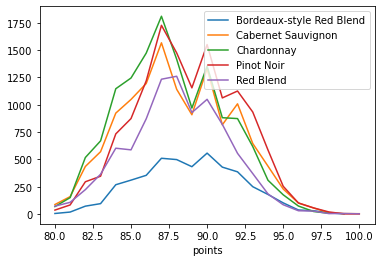

In [13]:
wine_counts.plot.line()

Using a line chart this way makes inroads against the second limitation of stacked plotting: interpretability. Bivariate line charts are much more interpretable because the lines themselves don't take up much space. Their values remain readable when we place multiple lines side-by-side, as here.  

For example, in this chart we can easily answer our question from the previous example: which wine most commonly scores an 87. We can see here that the Chardonnay, in green, narrowly beats out the Pinot Noir, in red.

----

## Exercises

In this section of the tutorial we introduced and explored some common bivariate plot types:

* Scatter plots
* Hex plots
* Stacked bar charts and area charts
* Bivariate line charts

Let's now put what we've learned to the test!

To start off, try answering the following questions:

1. A scatter plot or hex plot is good for what two types of data?
2. What type of data makes sense to show in a stacked bar chart, but not in a bivariate line chart?
3. What type of data makes sense to show in a bivariate line chart, but not in a stacked bar chart?
4. Suppose we create a scatter plot but find that due to the large number of points it's hard to interpret. What are two things we can do to fix this issue?

To see the answers, click the "Output" button on the cell below.

In [14]:
from IPython.display import HTML
HTML("""
<ol>
<li>Scatter plots and hex plots work best with a mixture of ordinal categorical and interval data.</li>
<br/>
<li>Nominal categorical data makes sense in a stacked bar chart, but not in a bivariate line chart.</li>
<br/>
<li>Interval data makes sense in a bivariate line chart, but not in a stacked bar chart.</li>
<br/>
<li>One way to fix this issue would be to sample the points. Another way to fix it would be to use a hex plot.</li>
</ol>
""")

Next, let's replicate some plots. Recall the Pokemon dataset from earlier:

In [18]:
pokemon = pd.read_csv("pokemon.csv", index_col=0)
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [23]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

For the exercises that follow, try forking this notebook and replicating the plots that follow. To see the answers, hit the "Input" button below to un-hide the code.

<AxesSubplot:xlabel='attack', ylabel='defense'>

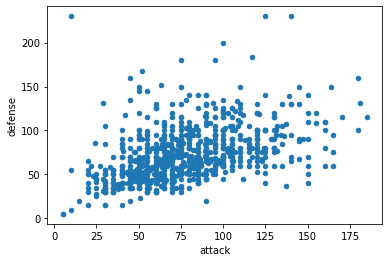

In [24]:
pokemon.plot.scatter(x='attack', y='defense')

<AxesSubplot:xlabel='attack', ylabel='defense'>

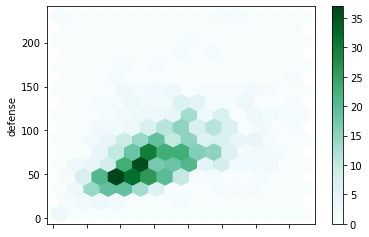

In [25]:
pokemon.plot.hexbin(x='attack', y='defense', gridsize=15)

For thee next plot, use the following data:

In [27]:
pokemon_stats_legendary = pokemon.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]

<AxesSubplot:xlabel='is_legendary,generation'>

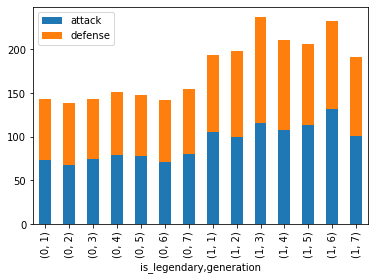

In [28]:
pokemon_stats_legendary.plot.bar(stacked=True)

For the next plot, use the following data:

In [37]:
pokemon_stats_by_generation = pokemon.groupby('generation').mean()[['hp', 'attack', 
                                                                    'defense', 
                                                                    'attack', 'defense', 
                                                                    'speed']]

<AxesSubplot:xlabel='generation'>

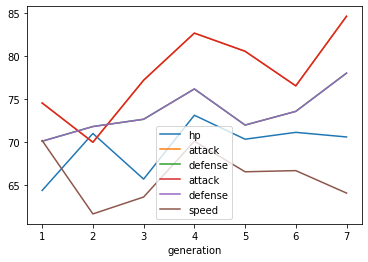

In [38]:
pokemon_stats_by_generation.plot.line()